In [1]:
import sys
sys.path.insert(0,'../omphalos')

from context import omphalos

# Import data processing modules.
import pandas as pd
import numpy as np

# Import machine learning modules.

# Import Omphalos modules.
import generate_inputs as gi
import file_methods as fm
import my_metrics as mm
import omphalos_plotter as op
import attributes as attr
import labels as lbls

# Import data visualisation modules.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### Import and extract data

In [2]:
train_set = fm.unpickle('data/rifle_pyrite.pickle')

In [3]:
attributes_df = attr.boundary_condition(train_set, boundary='x_begin')
labels_df = lbls.secondary_precip(train_set)

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:6390: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [4]:
x = attributes_df.loc[:, ['NH4+', 'SO4--','Ca++', 'Acetate', 'CO2(aq)']]
# Volume fraction
# Saturation index
#y = (labels_df.xs(5, level=1)['Calcite'].drop(columns=['File  Num']))

In [5]:
y = labels_df.sum(level=0)['FeS(am)'] + labels_df.sum(level=0)['FeS34(am)']

## Visualisation

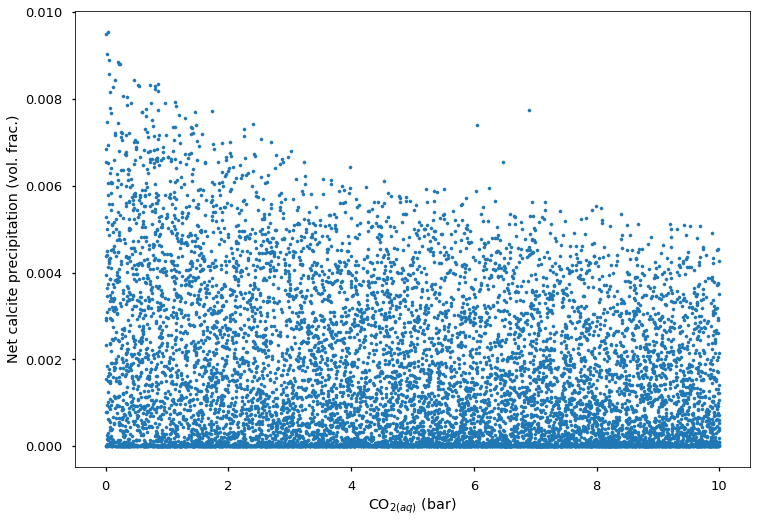

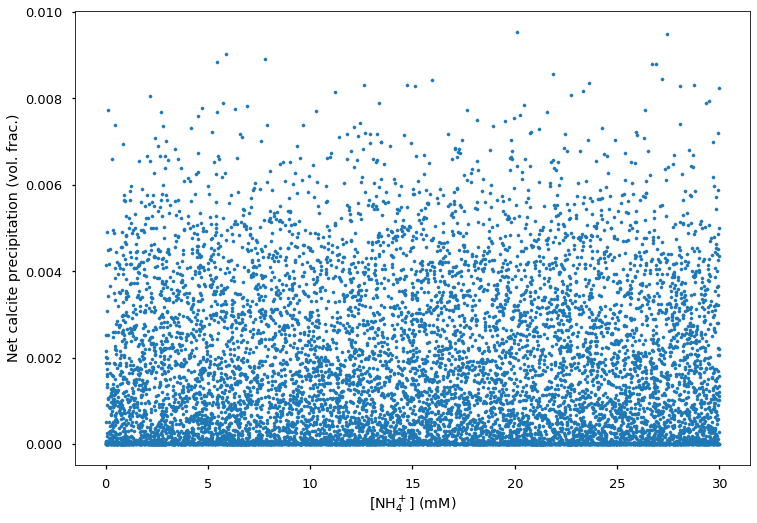

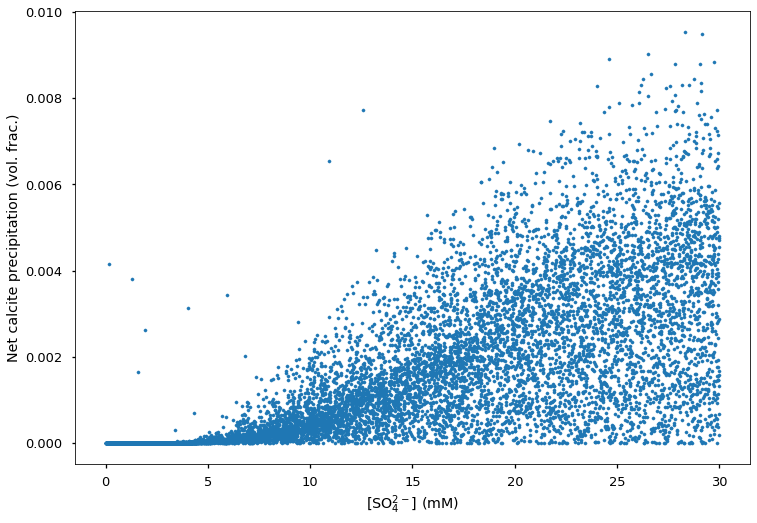

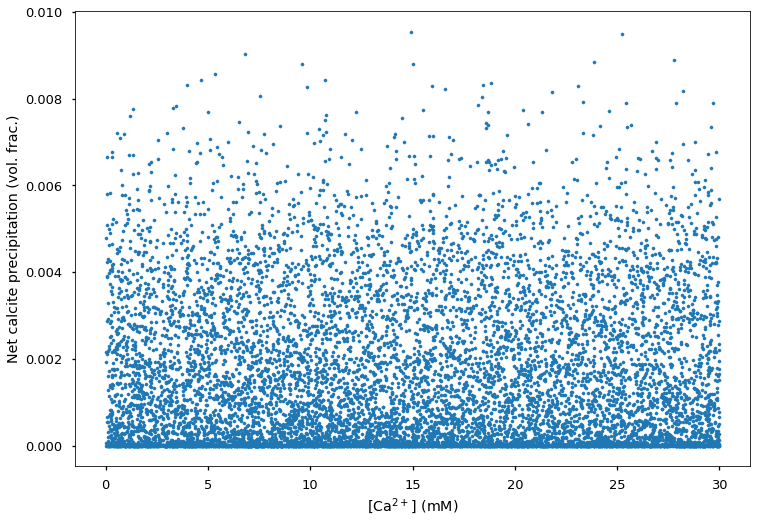

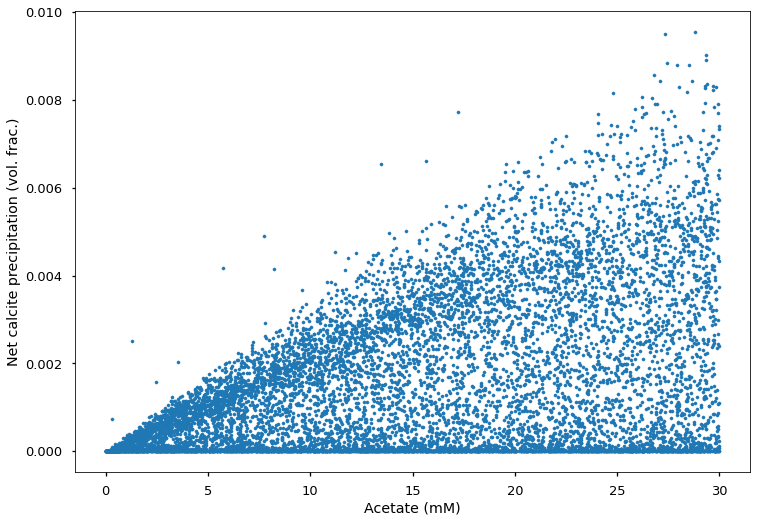

In [8]:
plt.style.use('seaborn-talk')

plot_list = ['CO2(aq)', 'NH4+', 'SO4--', 'Ca++', 'Acetate']
x_labels = ['CO$_{2(aq)}$ (bar)', '[NH$_4^+$] (mM)', '[SO$_4^{2-}$] (mM)', '[Ca$^{2+}$] (mM)', 'Acetate (mM)'] 

for x_label, species in zip(x_labels, plot_list):
    #g = sns.jointplot(x=x_train[species], y=y_train, kind="scatter", marker='o', s=15, height=10)
    fig, ax = plt.subplots(1, 1, constrained_layout=True)
    ax.scatter(x[species], y, s=10)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel('Net calcite precipitation (vol. frac.)')
    
    fig.savefig('figures/scatter_{}'.format(species), dpi=300)

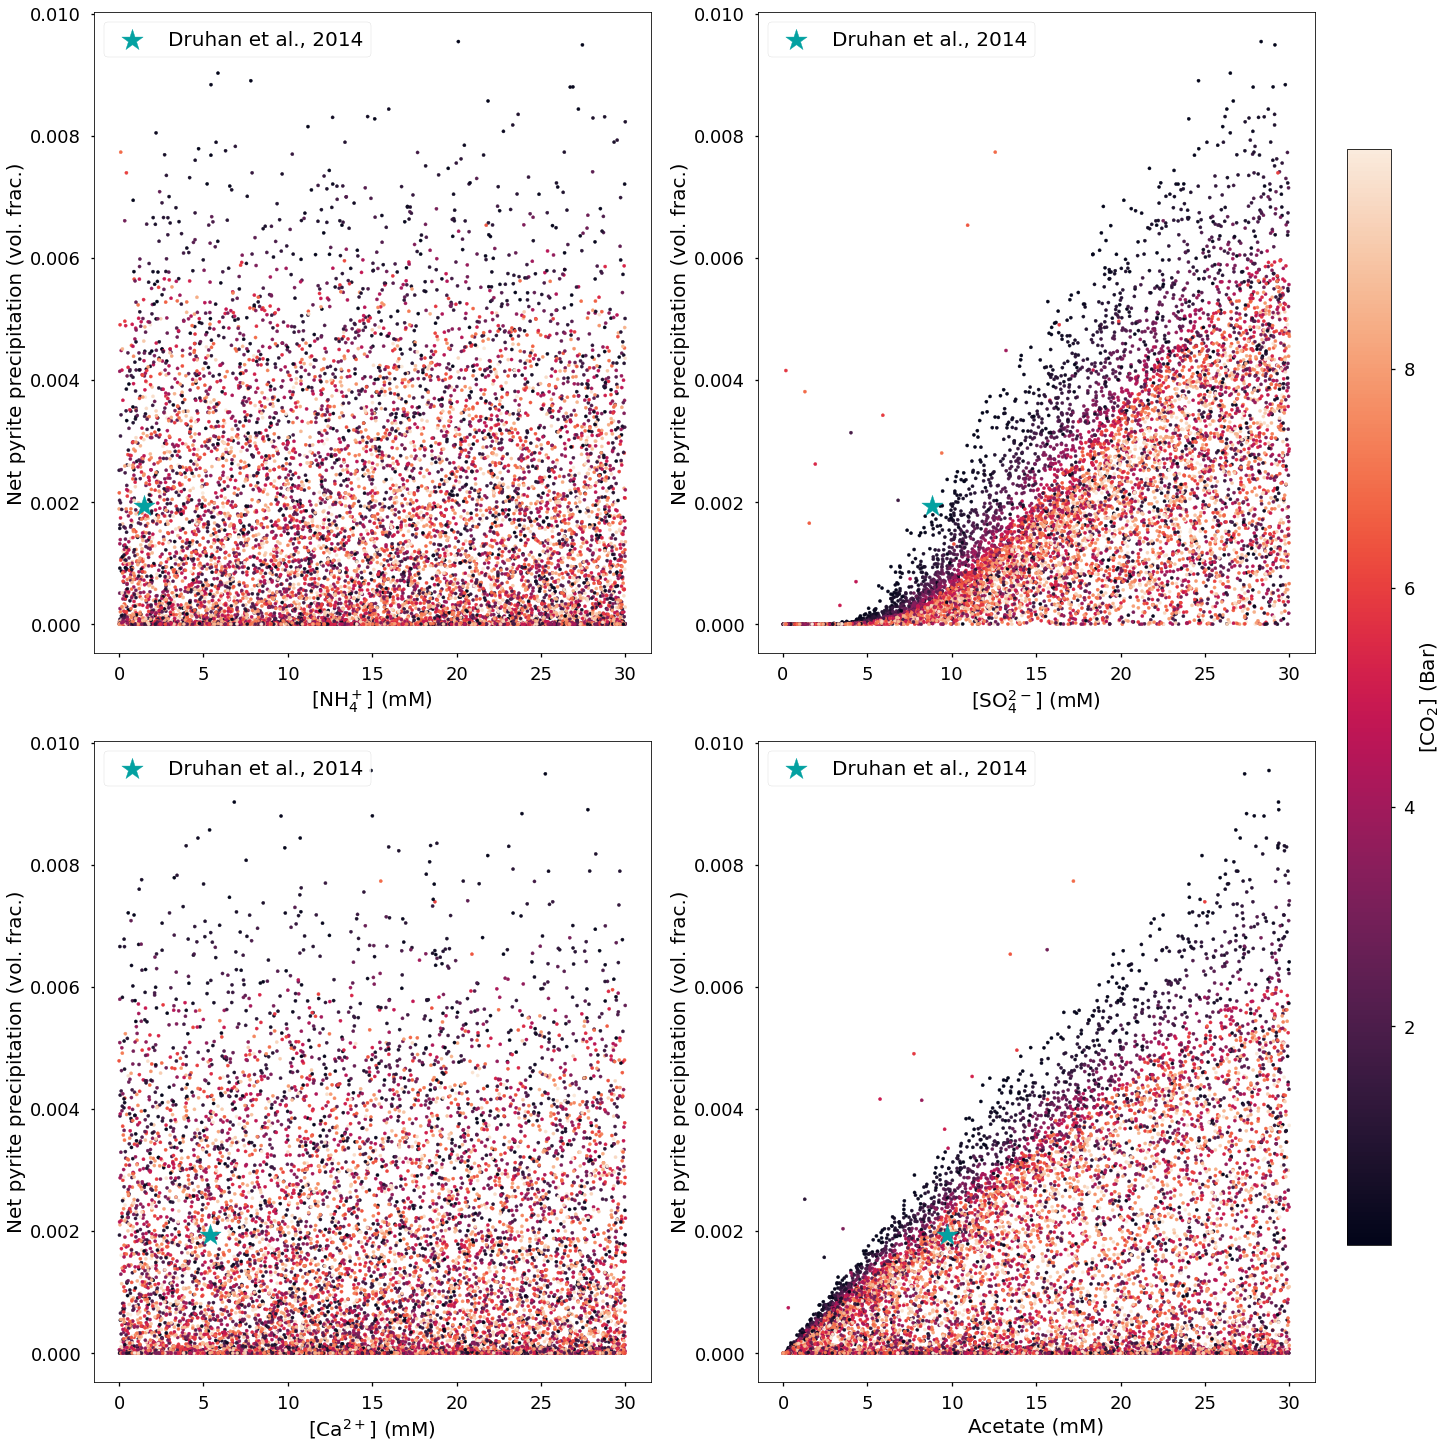

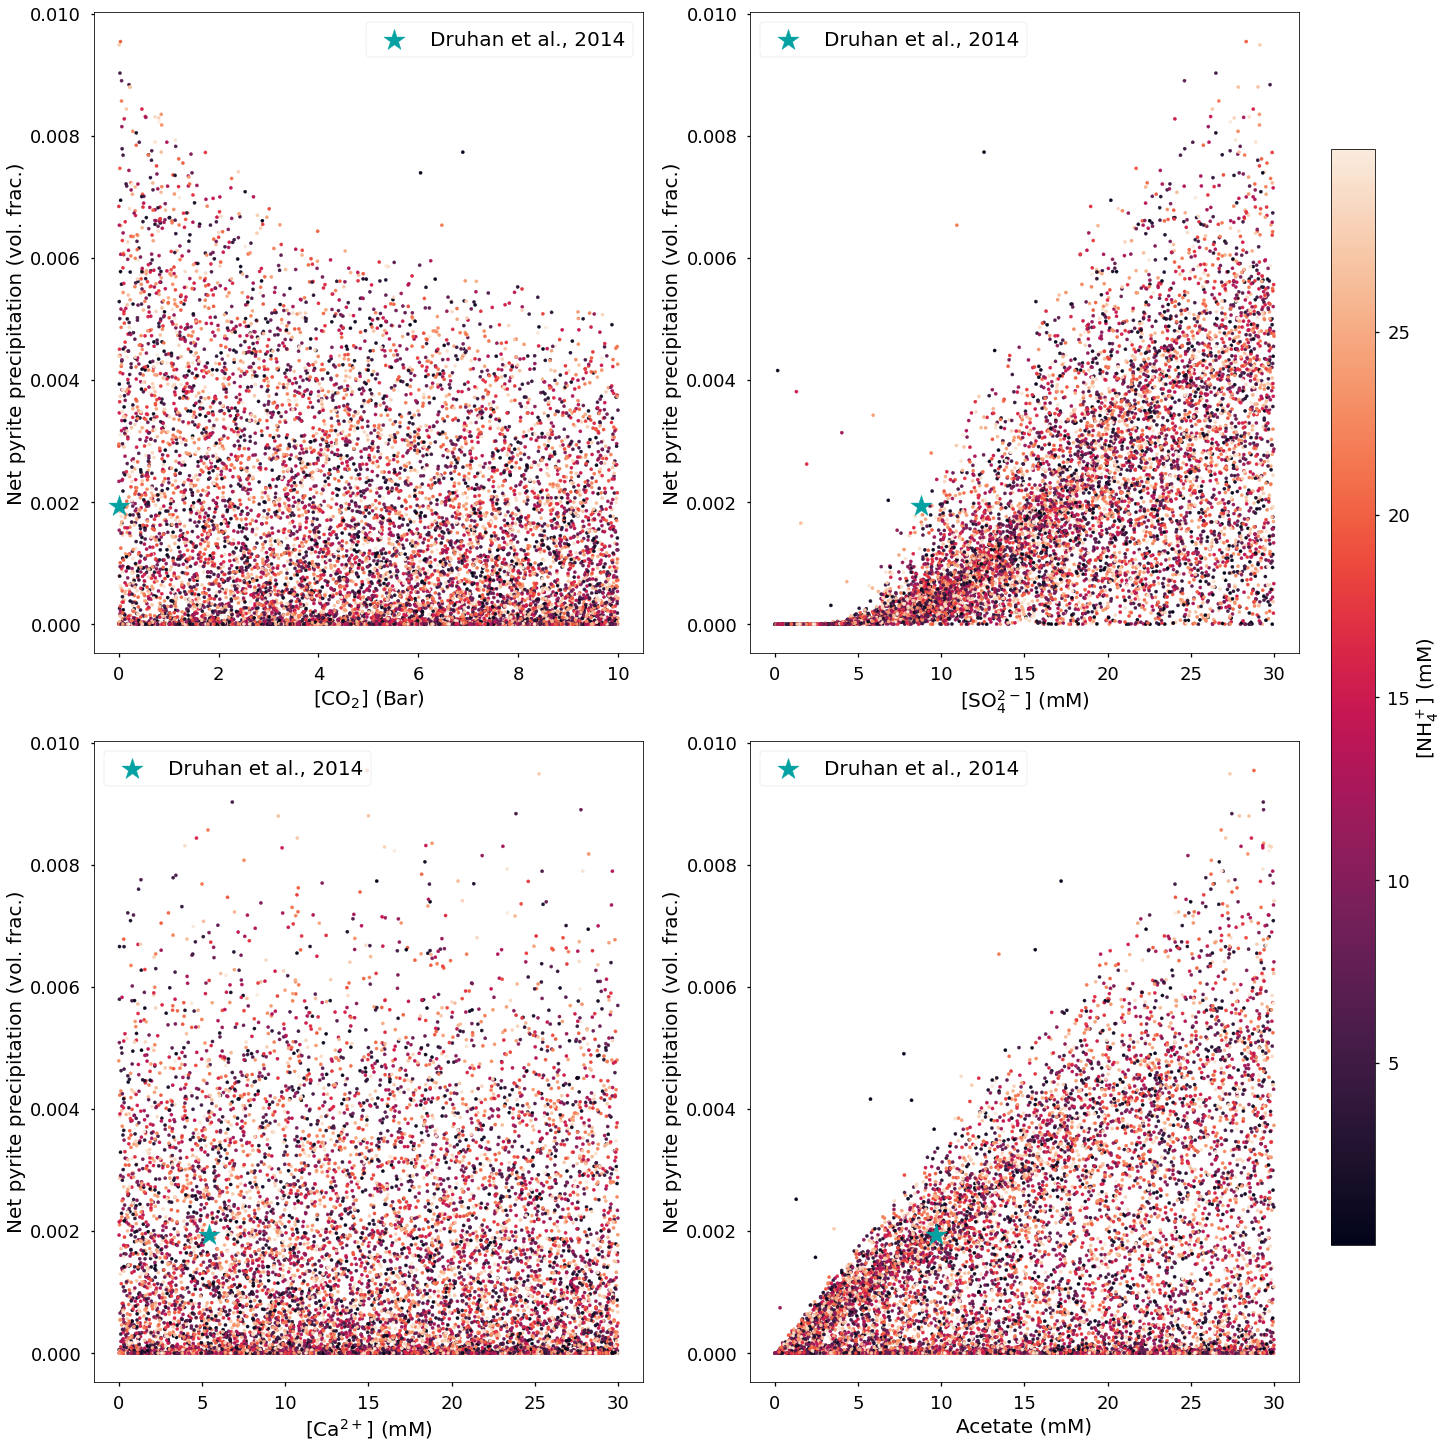

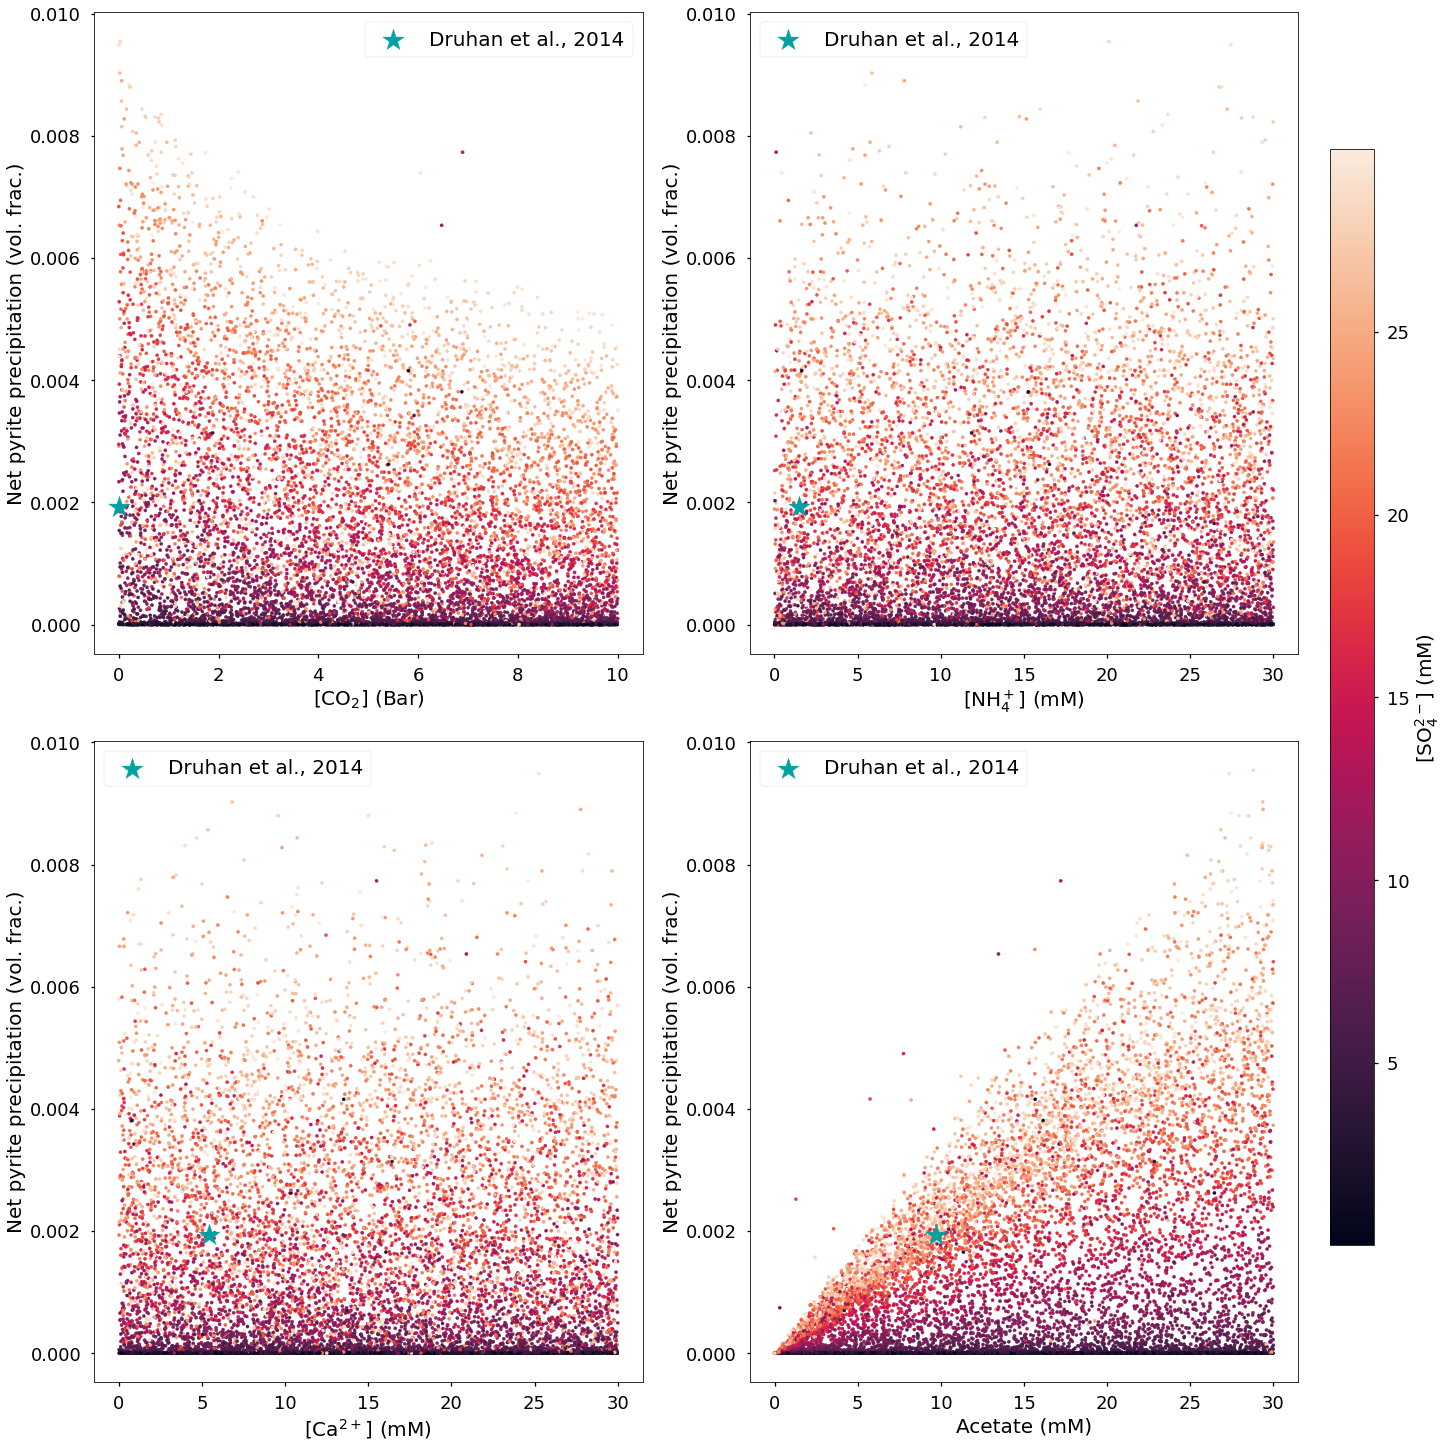

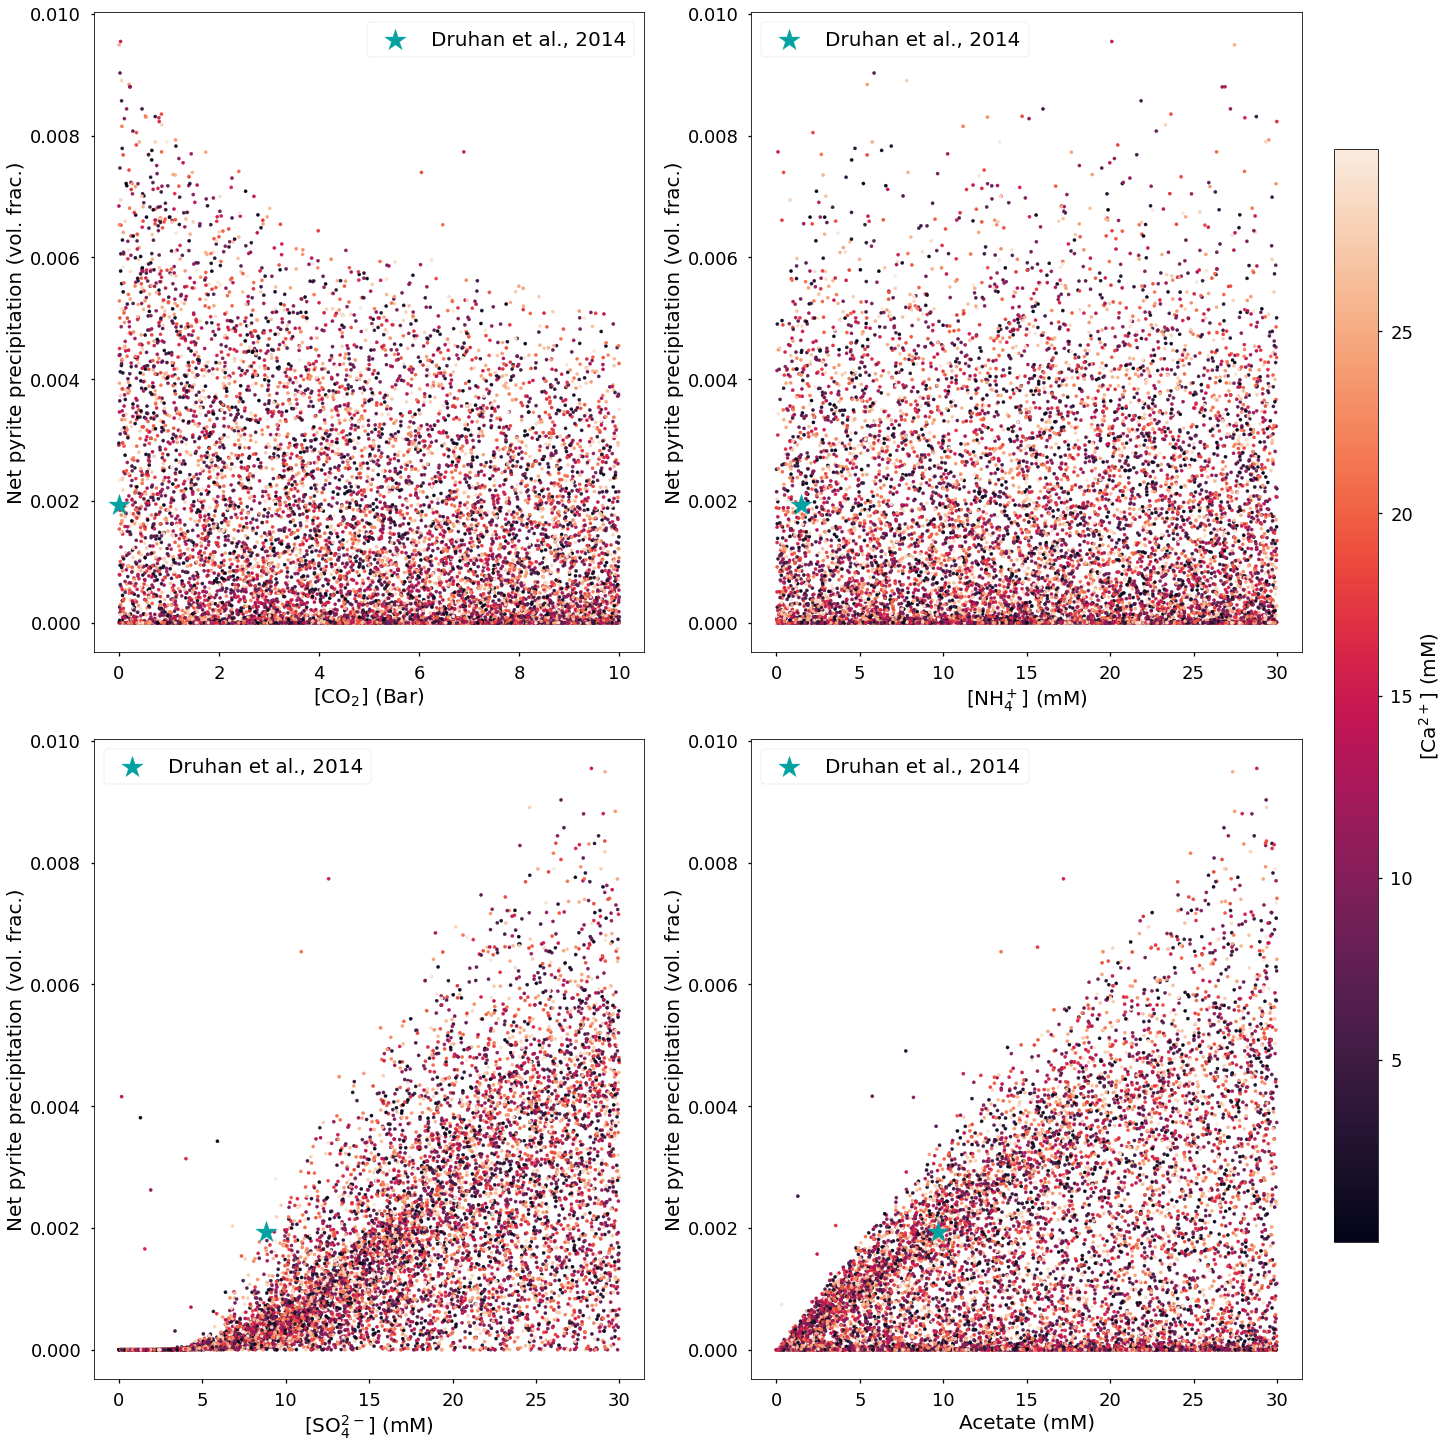

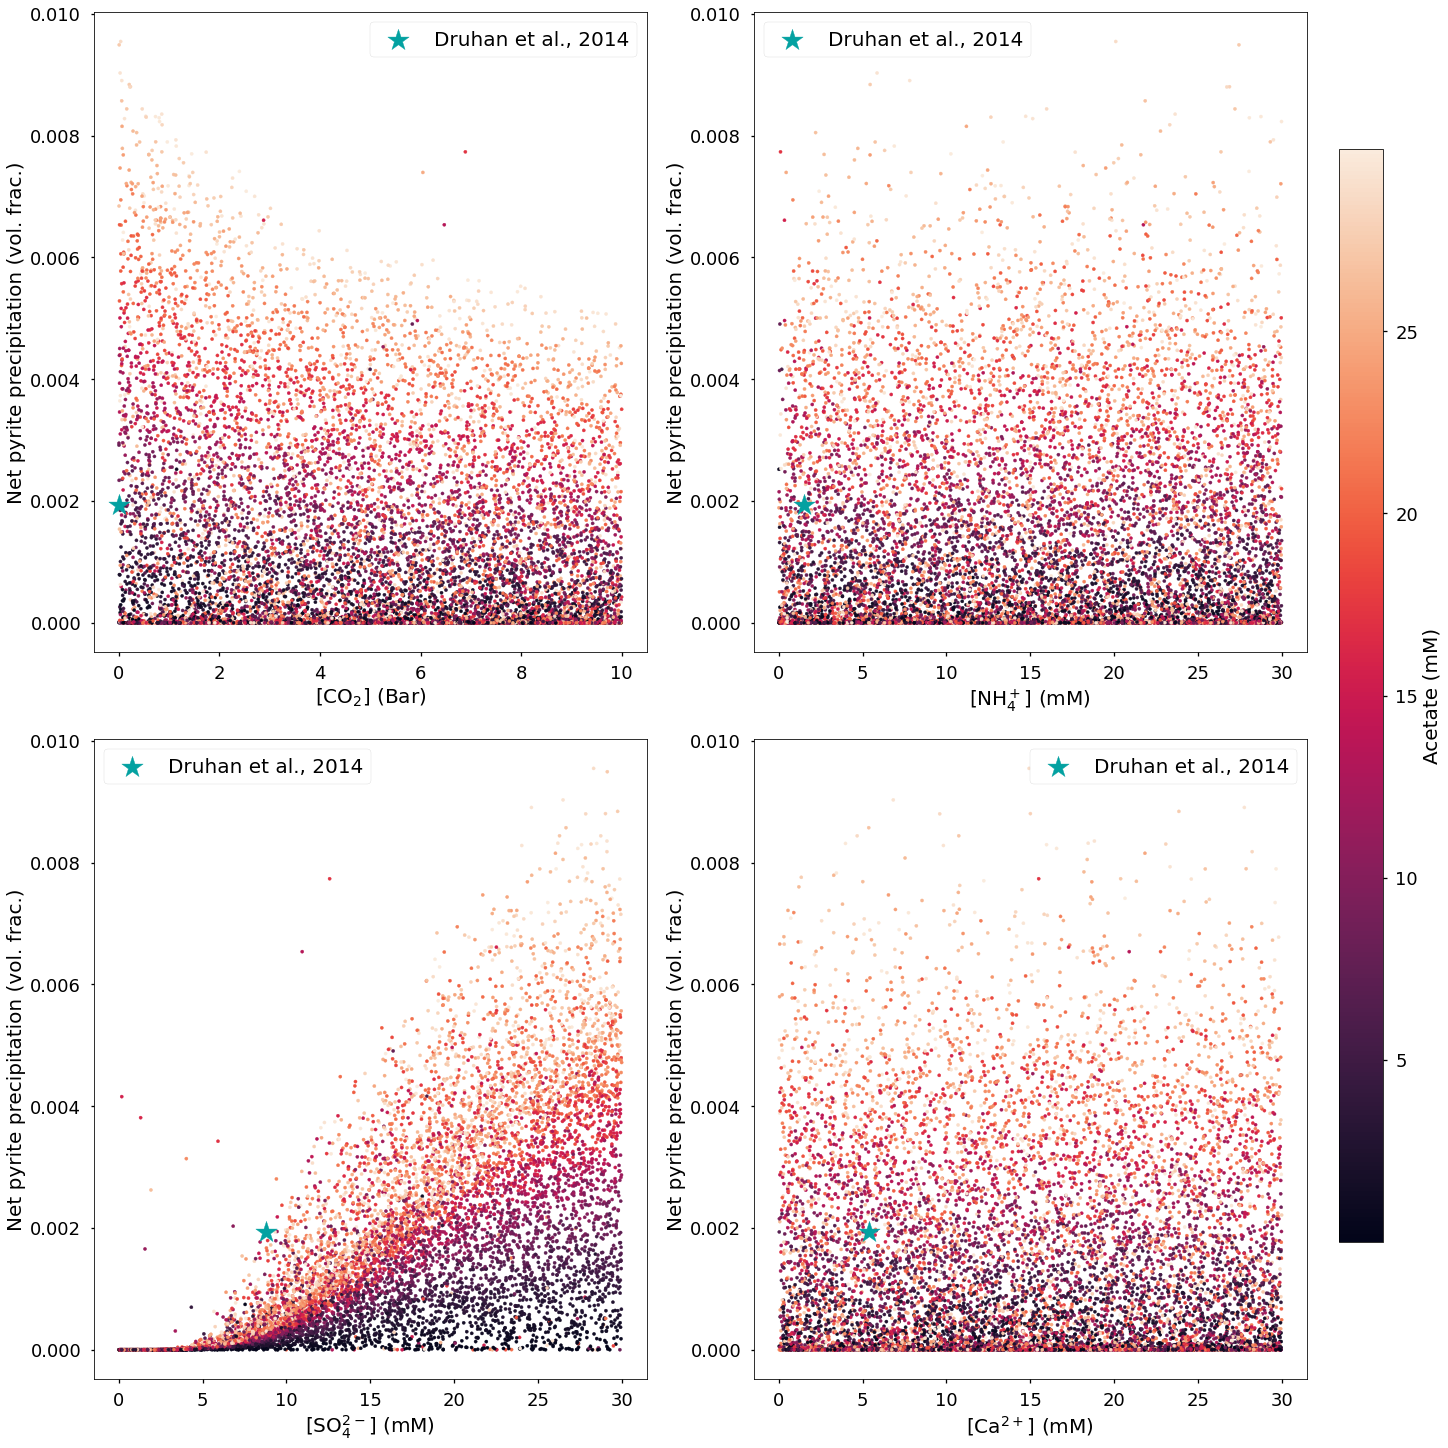

In [7]:
plt.style.use('seaborn-talk')
for i, cmap_var in enumerate(['CO2(aq)', 'NH4+', 'SO4--', 'Ca++', 'Acetate']):
    
    plot_list = ['CO2(aq)', 'NH4+', 'SO4--', 'Ca++', 'Acetate']
    x_labels = ['[CO$_{2}$] (Bar)',  '[NH$_4^+$] (mM)', '[SO$_4^{2-}$] (mM)', '[Ca$^{2+}$] (mM)', 'Acetate (mM)']
    
    default_vals=[8.4726e-3, 1.5, 8.80, 5.4, 9.70]
    default_precip = 0.0019312355889999997

    plot_list.pop(i)
    default_vals.pop(i)
    cmap_label = x_labels.pop(i)
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 20), constrained_layout=True)
    for x_label, species, default, axis in zip(x_labels, plot_list, default_vals, ax.reshape(-1)):
        im = axis.scatter(x=x[species], y=y, c=x[cmap_var], cmap='rocket', s=10)
        axis.set_xlabel(x_label, fontsize=20)
        axis.set_ylabel('Net pyrite precipitation (vol. frac.)', fontsize=20)
        axis.tick_params('both', labelsize=18)
        axis.scatter(default, default_precip, marker='*', c='#03A1A1', s=500,label='Druhan et al., 2014')
        axis.legend(fontsize=20)

    cbar = fig.colorbar(im, ax=ax[:,1], shrink=0.8)
    cbar.set_label(cmap_label, fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    fig.savefig('/Users/angus/PhD_pres/rifle_plots/shaded_{}'.format(cmap_var), dpi=300)